### Unsupervised learning approaches

This notebooks demonstrates a few unsupervised learning approaches using the diabetes dataset in sklearn.

Although the diabetes dataset is a regresion problem, we will use it to explore a few unpservised learning algorithms:

- PCA
- t-sne

Dimensionality reduction arises when we have data with high dimensions (i.e. number of features) and we want to either be able to reduce the dimensions for visualization purposes, as a feature selection step or simply a step preceding training a supervised learning model.   

#### Data import 

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The native to sklearn datasets are raw and dictionary-like. 

In [2]:
raw_data = load_diabetes()
raw_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Transform them to a normal pandas DataFrame.

In [3]:
data = pd.DataFrame( np.c_[raw_data['data'], raw_data['target']],
                     columns= raw_data['feature_names'] + ['target'])

In [4]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
data.shape

(442, 11)

In [6]:
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


We see that the features have been scaled/normalized (could be very important with PCA).

### Visualization: T-SNE 

Most data we will work with is high dimensional. The beauty of t-sne is that it can transform it to 2-D or 3-D. 
The mapping preserves the nearness of samples. 

This approach is mainly used as enhancing our understanding of the data. It is a manifold technique (it computes a new representation of the training data but will NOT allow transformation of new data). This means that if you have built a TSNE model on your training data, then you cannot apply the same model to the test data. 

T-SNE can also take realtively long time to train. And remember, it is a way to visualize your data in 2-D

In [8]:
from sklearn.manifold import TSNE

y = data.target
X = data.drop('target', axis=1)

model= TSNE()
# Apply the tsne results in creating a 2-D array with length = length of our data set and 2 columns. 
transformed = model.fit_transform(X)

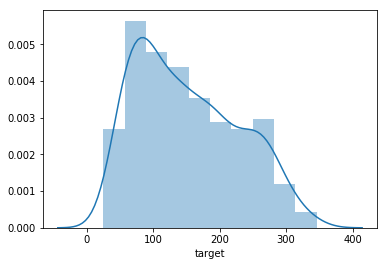

In [9]:
import seaborn as sns
y.describe()
sns.distplot(y)

# Will put y in 3 buckets
y_recoded = np.where(y< 150, 1, np.where(y<250, 2, 3))

In [12]:
# The shape[0] = the number of rows in the data set; We have two columns: one for each axis.
transformed.shape

(442, 2)

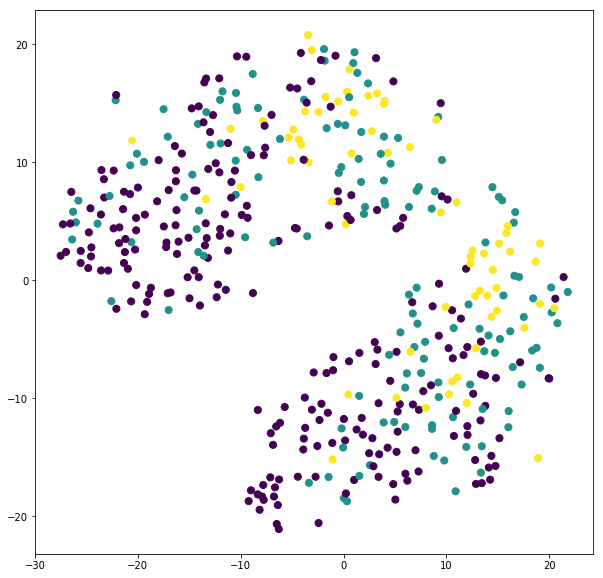

In [13]:
# Let's plot the TSNE model
# X and Y are the axes, they have nothing to do with the target of the model (we only have worked with the X matrix)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

# We can color by the recoded target however (put into 3 buckets)
plt.figure(figsize=(10, 10))
plt.scatter(x_axis, y_axis, s=50, c=y_recoded)
plt.show()

It looks like there are no clear clusters/groups in the data. Perhaps we can re-train the TSNE model by specifying the learning rate.

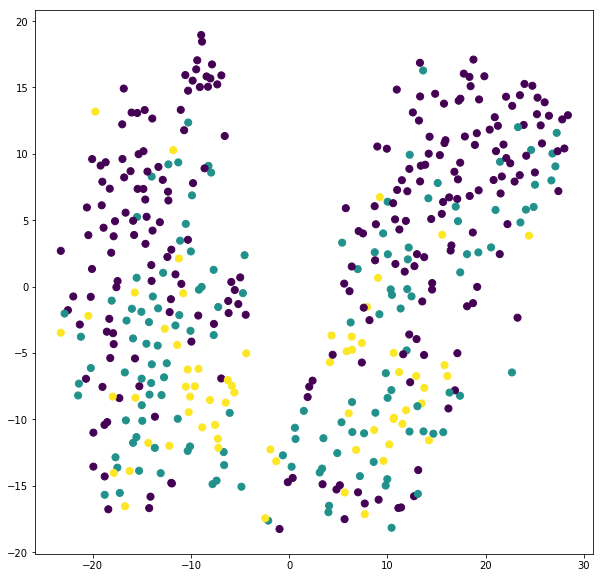

In [14]:
model= TSNE(learning_rate=200)
# Apply the tsne results in creating a 2-D array with length = length of our data set and 2 columns. 
transformed = model.fit_transform(X)

# Let's plot the TSNE model
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

# We will color by the recoded target (put into 3 buckets)
plt.figure(figsize=(10, 10))
plt.scatter(x_axis, y_axis, s=50, c=y_recoded)
plt.show()

It looks a bit better when we specified a learning rate but still not distinctive clusters/groups. The axes here cannot really be interpreted. And like with many unspervised learning methods, the graph may look different if the method is applied again. 

### Principal component analysis (PCA) 

The most popular dimensionality reduction technique. It finds the hyperplane that is closes to the data. Then it projects the data into it. 

THE MAIN GOAL: to project the data to lower dimensions while preserving the maximum variance as this will result in less loss of information. In the first step, PCA rotates the data in such a way that the rotated features are statistically uncorrelated. 
The principal components are actually the directions in which the samples vary the most (i.e. 'direction of the variance'). 

We perform dimensionality reduction by only selecting some of the components to keep. 

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA().fit(X)
transf = pca.transform(X)
print('Original shape: {}'.format(X.shape))
print('Shape of PCA array: {}'.format(transf.shape))

Original shape: (442, 10)
Shape of PCA array: (442, 10)


We see that the new PCA-transformed array has the same number of columns and rows as the original data. The columns of the transformed array are what are called 'PCA features'. 

In [20]:
transf[:5]

array([[ 0.02793062, -0.09260116,  0.02802696, -0.00393895, -0.01220663,
        -0.04809855, -0.00855256,  0.03602797, -0.00861296, -0.00232861],
       [-0.13468605,  0.06526341,  0.00132778, -0.02235559, -0.00681271,
        -0.04818421,  0.01067428, -0.00896163,  0.0240261 ,  0.00207334],
       [ 0.01294474, -0.07776417,  0.0351635 , -0.03764663, -0.05535734,
        -0.05293076, -0.02199441,  0.0401086 , -0.00120629, -0.0025774 ],
       [ 0.00234544,  0.01818194, -0.0957504 ,  0.06531834,  0.01215425,
         0.02118148,  0.02293337, -0.01749614, -0.00655813, -0.00354768],
       [-0.03598069,  0.03862136, -0.00272351, -0.00654115, -0.00634255,
        -0.03874615,  0.02075986, -0.05040895,  0.00210704, -0.00051813]])

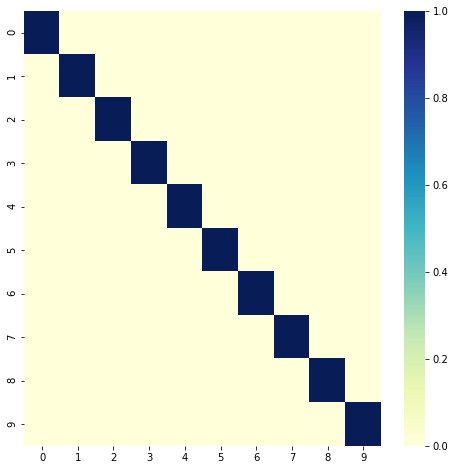

In [139]:
# Let's plot the transformed array to see there is really no correlation between the features.
plt.figure(figsize=(8, 8))
sns.heatmap(pd.DataFrame(transf).corr(), cmap="YlGnBu")

In [140]:
# We can also inspect the components:
print(pca.components_)

[[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [ 0.04437151 -0.38654811 -0.15628061 -0.13825564  0.57302669  0.45593985
   0.50624287 -0.06818423 -0.0261893  -0.0849466 ]
 [ 0.49466811 -0.10685833  0.1675317   0.51356804 -0.0685867  -0.26969438
   0.38602787 -0.38068121  0.0636315   0.27684271]
 [-0.4140095  -0.67986052  0.49982533 -0.01966734 -0.06839533 -0.16777384
  -0.07602005  0.0079212   0.26442742  0.08708624]
 [-0.68686389  0.37345612  0.12935936  0.48689014  0.12917415  0.11673143
   0.24499115 -0.14364377 -0.1516611   0.03138792]
 [-0.2258505   0.04173103 -0.4031419  -0.27276274  0.00540864 -0.1332572
   0.1063716  -0.0339454   0.17873005  0.80506447]
 [-0.10953821 -0.06760551 -0.51985787  0.32064908  0.07364908 -0.23054011
  -0.00753445  0.07123619  0.64731345 -0.35727279]
 [ 0.01493468  0.44293966  0.39294187 -0.47736435  0.12941351 -0.19131121
   0.32463641 -0.18058834  0.44966002 -0.1666087 ]
 

To find out how many components to use, we will keep track of the variance explained with the increase of a number of features. 

Text(0,0.5,'variance')

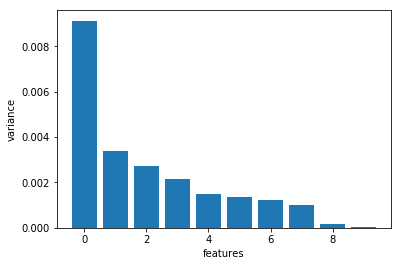

In [143]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('features')
plt.ylabel('variance')

In [145]:
# You can use the explained_variance_ratio_ argument to see what proportion of the variance much each pincipal component captures

pca.explained_variance_ratio_

array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192, 0.05365605, 0.04336832, 0.00783199, 0.00085605])

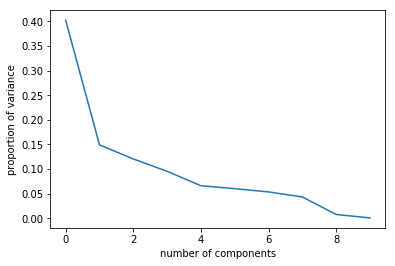

In [21]:
# We can plot the explained variance ratio.
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('proportion of variance')
plt.show()

Ideally, you'd like to capture a large enough proportion of the variance, say 95%. 

In [152]:
# An altenative is to directly give the number of explained variance ratio we want as an argument in the pca

pca_95 = PCA(n_components=0.95).fit(X)
X_pca_95 = pca_95.transform(X)
print('How many components does the 95% explained variance retain:  {}'.format(X_pca_95.shape[1]))

How many components does the 95% explained variance retain:  8


## PCA as a feature selection technique

Though PCA is most appropriate for dimensionality reduction, we can still use the output of PCA as a feature selection method.

One approach we can follow is after we select the number of components, to pick those among the original features which display the highest absolute correlation with each of the PCA components. 

Say in our case, we select 3 princicap components.

In [25]:
# Select the first three principal components
transf = transf[:,:3]

X_pca = pd.DataFrame(transf, columns = ['PC1', 'PC2', 'PC3'])

In [26]:
X_pca.head()

,PC1,PC2,PC3
0,0.0279,-0.0926,0.0280
1,-0.1347,0.0653,0.0013
2,0.0129,-0.0778,0.0352
3,0.0023,0.0182,-0.0958
4,-0.0360,0.0386,-0.0027


In [37]:
def corr_feature_pca_component(original_data, pca_data, column):
    """
    This function takes in a data frame of selected number of principal components, correlated them with the original features,
    and returns a dataframe with sorted correlation between one column of the principal component table and the original features
    
    INPUT
    original data: pd.dataframe()
    pca_data: pd.dataframe() where each column is the values of each PCA component vector
    column: a PC of choice
    
    """
    corr_pc = pd.DataFrame(original_data.corrwith(pca_data[column]), columns = [column])
    corr_pc = corr_pc.abs()
    return corr_pc.sort_values(by=column, ascending=False)


In [47]:
corr_pc1 = corr_feature_pca_component(X, X_pca, 'PC1')
corr_pc2 = corr_feature_pca_component(X, X_pca, 'PC2')
corr_pc3 = corr_feature_pca_component(X, X_pca, 'PC3')

These 3 data sets show the correlation between original features and the respective principal components. Now, using various level of correlation threshold, we create binary features for whether the correation is above a certain threshold or not. 

In [60]:
def is_corr_above_threshold(data, column, corr_values=[0.7, 0.8, 0.9]):
    """
    This function takes in the data set with sorted correlation values, and a list of correlation values and return a data set with binary
    columns, where the new columns = 1 if the corr is above a specified threshold and 0 otherwise. 
    
    #####
    INPUT:
    
    data: pd.dataframe() of one of the datasets above, which contain the absolute values of correlation between principal components and original
    features
    
    column: the respective column of the data set (principle component 1, 2, etc.)
    corr_values : a list of correlation values to consider
    
    #####
    RETURNS:
    
    data: pd.dataframe(), which is the original data + extra binary columns as specified above 
    
    """
    for i in corr_values: 
        threshold = []
        
        for value in data[column]:
            if value >= i:
                threshold.append(1)
            else:
                threshold.append(0)
        data['threshold' + str(i)] = threshold
    return data

In [62]:
corr_pc2 = is_corr_above_threshold(corr_pc2, 'PC2')
corr_pc2.head()

,PC2,threshold0.7,threshold0.8,threshold0.9
s1,0.7000,1,0,0
s3,0.6184,0,0,0
s2,0.5570,0,0,0
sex,0.4722,0,0,0
bmi,0.1909,0,0,0
